In [1]:
import numpy as np 
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

rcParams ['figure.figsize'] = 15, 5
%matplotlib inline

COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams["figure.figsize"] = (15,5)

# JPY/USD Exchange Rate Modeling

<br>
Here we are going to model the exchange rate between the Yen and the Dollar to see if we can create a good model to predict the future price of the exchange rate. We will look at several papers that we will use to guide us and also give us a deeper knowledge of the Japanese and US economies in relation to there currency. 

First we will load in our data. Then we will graph our data and replace any missing data. 

In [2]:
exchange = pd.read_csv('DEXJPUS.csv')
exchange.head()

,DATE,DEXJPUS
0,2013-01-02,87.10
1,2013-01-03,86.92
2,2013-01-04,88.14
3,2013-01-07,87.68
4,2013-01-08,87.31


In [3]:
exchange = exchange.rename(columns={"DEXJPUS" : "Rate"})

In [4]:
exchange['Rate'] = pd.to_numeric(exchange.Rate, errors='coerce')

exchange.dropna(inplace=True)

In [5]:
exchange.head()

,DATE,Rate
0,2013-01-02,87.10
1,2013-01-03,86.92
2,2013-01-04,88.14
3,2013-01-07,87.68
4,2013-01-08,87.31


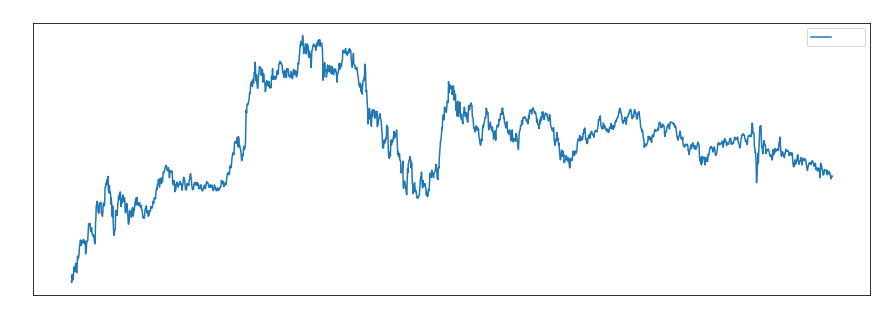

In [6]:
exchange.plot()
plt.title('JPY/USD Exchange Rate')
plt.show()

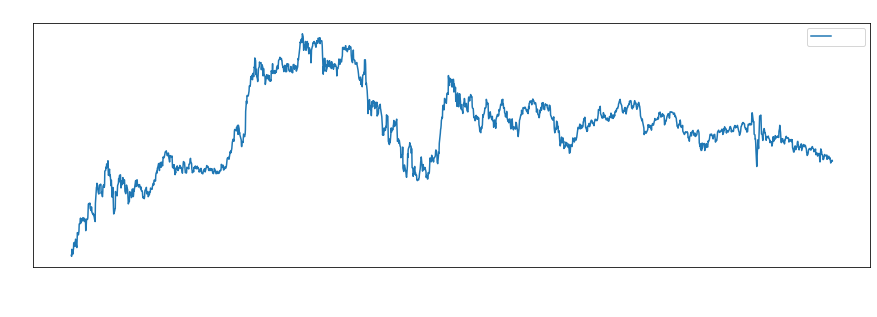

In [7]:
# we need to change the x-axis to dates 
exchange.index = pd.to_datetime(exchange.DATE)
exchange.plot()
plt.title('JPY/USD Exchange Rate')
plt.show()

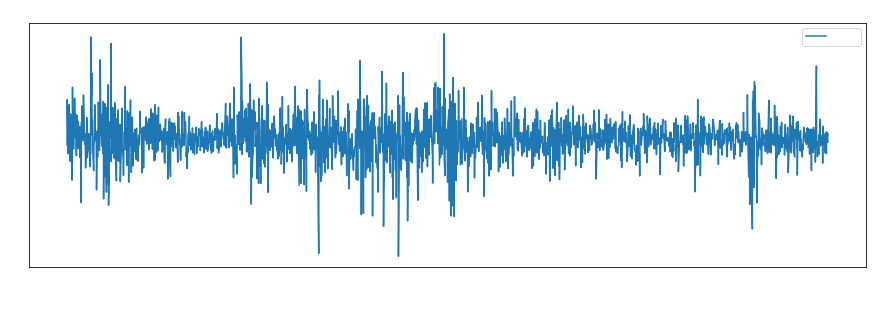

In [8]:
# Let's plot the difference and see if there is a trend in our data. 
exchange['diff1'] = exchange.Rate - exchange.Rate.shift()
exchange.plot(y='diff1')
plt.title('JPY/US Exhchange Rate')
plt.show()

Text(0.5, 1.0, 'Exchange Rate PACF')

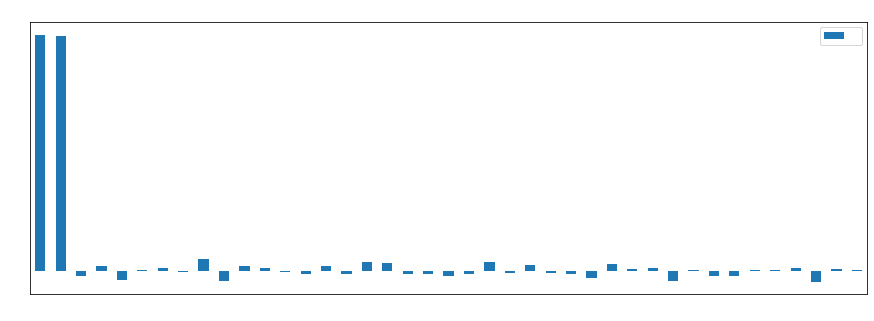

In [11]:
# now we will look at the PACF and see if there is any autocorrelation.
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(exchange.Rate))
x_acf.plot(kind='bar')
plt.title("Exchange Rate PACF")

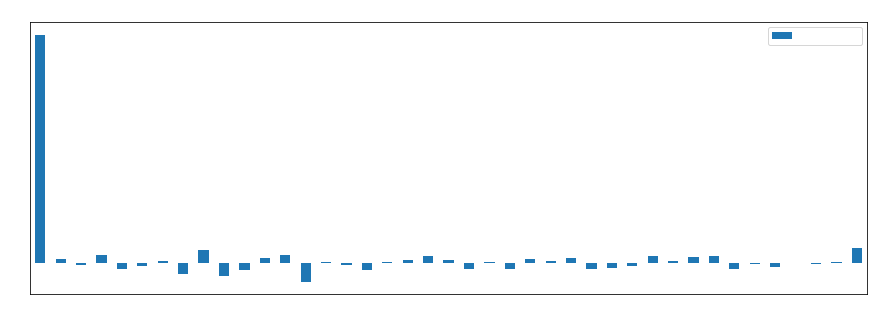

In [12]:
# we do have one strong autocorrelation but the rest doesn't really show any. Let's check our differenced
# set of data. 
x_acf = pd.DataFrame(pacf(exchange.diff1[1:]))
x_acf.plot(kind='bar')
plt.title("Differenced PACF")
plt.legend(['Differenced'])

## ARIMA Modeling 
<br>
Now we will build our models with some different parameters. Before we do so let's briefly go over what goes into creating an ARIMA model. In a ARIMA model 3 parameters are passed(p, d, q) in that order. They correspond to AR, I, and MA. AR(Autoregression) is the past values where it uses the dependent relationship between an observation and some number of lagged observations. I(Integrated) is the level of differencing where we subtract an observation from an observation at the previous time step in order to make the time series stationary. MA(Moving Average) adjusts for past errors, this happens because of the dependency between an observation and a residual error from a moving average model applied to lagged observations.   
<br> 
The last thing to cover is how to set each parameter and what that changes in the model. Setting a value to 0 for p,d or q will mean that element won't be used for the model. Using an ARIMA model requires the need to confirm assumptionsof the model in the raw observations and in the residual errors of forecasts from the model.

In [15]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA', FutureWarning)

from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(exchange.Rate, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rate   No. Observations:                 1995
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1868.013
Method:                           css   S.D. of innovations              0.617
Date:                Wed, 30 Dec 2020   AIC                           3740.025
Time:                        10:34:42   BIC                           3751.222
Sample:                             1   HQIC                          3744.137
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0082      0.014      0.596      0.551      -0.019       0.035
Residuals Description
count    1.995000e+03
mean     1.694814e-09
std      6.173367e-01
min     -3.648231e+00
25%     -3.082306e-01

c:\users\greg\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\greg\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date ind

In [17]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(exchange.Rate, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                   Rate   No. Observations:                 1996
Model:                     ARMA(1, 0)   Log Likelihood               -1870.906
Method:                       css-mle   S.D. of innovations              0.617
Date:                Wed, 30 Dec 2020   AIC                           3747.812
Time:                        11:05:39   BIC                           3764.608
Sample:                             0   HQIC                          3753.980
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.7698      5.455     19.206      0.000      94.078     115.462
ar.L1.Rate     0.9977      0.002    620.937      0.000       0.995       1.001
                                    Roots           

c:\users\greg\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\greg\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date ind

In [18]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(exchange.Rate, order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

c:\users\greg\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\greg\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date ind

                              ARMA Model Results                              
Dep. Variable:                   Rate   No. Observations:                 1996
Model:                     ARMA(1, 1)   Log Likelihood               -1870.526
Method:                       css-mle   S.D. of innovations              0.617
Date:                Wed, 30 Dec 2020   AIC                           3749.053
Time:                        11:05:54   BIC                           3771.448
Sample:                             0   HQIC                          3757.277
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.9232      5.304     19.781      0.000      94.527     115.319
ar.L1.Rate     0.9976      0.002    599.273      0.000       0.994       1.001
ma.L1.Rate     0.0197      0.023      0.871      0.3

In [22]:
from statsmodels.tsa.arima_model import ARIMA
model_111 = ARIMA(exchange.Rate, order=(1,1,1))
model_111_fit = model_111.fit()
print(model_111_fit.summary())
print('Residuals Description')
print(model_111_fit.resid.describe())

c:\users\greg\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\greg\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date ind

                             ARIMA Model Results                              
Dep. Variable:                 D.Rate   No. Observations:                 1995
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1867.298
Method:                       css-mle   S.D. of innovations              0.617
Date:                Wed, 30 Dec 2020   AIC                           3742.596
Time:                        12:36:23   BIC                           3764.989
Sample:                             1   HQIC                          3750.819
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0082      0.014      0.586      0.558      -0.019       0.036
ar.L1.D.Rate    -0.5258      0.258     -2.035      0.042      -1.032      -0.019
ma.L1.D.Rate     0.5485      0.253      2.16

c:\users\greg\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [20]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(exchange.Rate, order=(5,1,5))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

c:\users\greg\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\greg\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date ind

                             ARIMA Model Results                              
Dep. Variable:                 D.Rate   No. Observations:                 1995
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -1858.371
Method:                       css-mle   S.D. of innovations              0.614
Date:                Wed, 30 Dec 2020   AIC                           3740.742
Time:                        11:06:41   BIC                           3807.923
Sample:                             1   HQIC                          3765.412
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0082      0.013      0.639      0.523      -0.017       0.033
ar.L1.D.Rate    -0.4121      0.037    -11.197      0.000      -0.484      -0.340
ar.L2.D.Rate     0.0922      0.021      4.49

## Results
<br>
Now that we have created 5 different ARIMA models with different parameters lets dig into the statistics on each model and see which model performed the best. We will start by calculating the residuals. What this does is we take the difference between our prediction and the observed quantity. We want our residuals to be random and normally distributed. Let's start with our (1,1,1) residuals.


Text(0.5, 1.0, 'Histogram of Residuals')

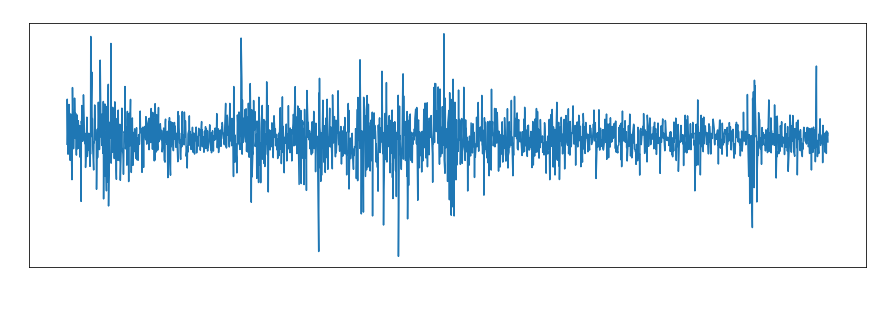

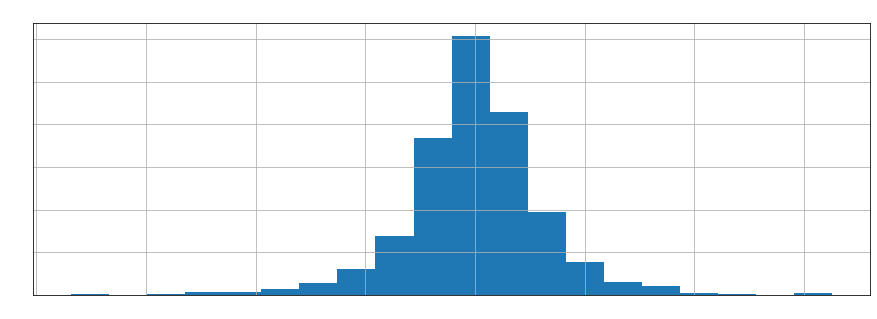

In [23]:
residuals = pd.DataFrame(model_111_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')